# AI On-Call Agent - ML Training and Analysis (Fixed)

This notebook demonstrates the machine learning capabilities of the AI On-Call Agent system.
We'll train models, analyze performance, and test predictions.

## Setup Instructions

Before running this notebook, ensure you have the required packages installed:

```bash
# Install required packages
pip install matplotlib seaborn pandas numpy scikit-learn joblib
```

This notebook demonstrates the ML capabilities in a simplified, self-contained environment.

In [6]:
# Import necessary libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
import time
from datetime import datetime, timezone
from collections import Counter

# Machine learning imports
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib

print("✅ All imports successful")
print(f"📁 Working directory: {Path.cwd()}")

✅ All imports successful
📁 Working directory: /Users/nickpeachey/Developer/projects/on-call-agent/notebooks


In [7]:
# Verify required packages are installed
required_packages = [
    'matplotlib', 'seaborn', 'pandas', 'numpy', 'sklearn', 'joblib'
]

missing_packages = []

print("🔍 Checking required packages...")

for package in required_packages:
    try:
        if package == 'sklearn':
            __import__('sklearn')
        elif package == 'joblib':
            __import__('joblib')
        else:
            __import__(package)
        print(f"  ✅ {package}")
    except ImportError:
        missing_packages.append(package)
        print(f"  ❌ {package}")

if missing_packages:
    print(f"\n⚠️ Missing packages: {', '.join(missing_packages)}")
    print("Please install them with:")
    print(f"pip install {' '.join(missing_packages)}")
else:
    print("\n✅ All required packages are installed!")
    print("🚀 Ready to proceed with the demo!")

🔍 Checking required packages...
  ✅ matplotlib
  ✅ seaborn
  ✅ pandas
  ✅ numpy
  ✅ sklearn
  ✅ joblib

✅ All required packages are installed!
🚀 Ready to proceed with the demo!


## 1. Initialize ML Service (Self-Contained)

**Step 1: Create the ML service framework**

This initializes the ML service class but doesn't train any models yet. The actual training happens in the next section.

In [20]:
# Self-contained ML Service for notebook demo
class NotebookMLService:
    """Simplified ML Service for notebook demonstration."""
    
    def __init__(self):
        # Use models directory in current path
        self.model_path = Path("../models")
        self.model_path.mkdir(parents=True, exist_ok=True)
        
        # Initialize models
        self.incident_classifier = None
        self.action_recommender = None
        self.text_vectorizer = None
        
        # Model metadata
        self.model_metadata = {
            "incident_classifier": {"loaded": False, "accuracy": 0.0, "trained_at": None},
            "action_recommender": {"loaded": False, "accuracy": 0.0, "trained_at": None}
        }
        
        print("✅ NotebookMLService initialized")
    
    def load_models(self) -> bool:
        """Load trained models from disk."""
        try:
            # Load incident classifier
            incident_model_path = self.model_path / "incident_classifier.joblib"
            if incident_model_path.exists():
                self.incident_classifier = joblib.load(incident_model_path)
                self.model_metadata["incident_classifier"]["loaded"] = True
                print("📁 Loaded incident classifier model")
            
            # Load action recommender
            action_model_path = self.model_path / "action_recommender.joblib"
            if action_model_path.exists():
                self.action_recommender = joblib.load(action_model_path)
                self.model_metadata["action_recommender"]["loaded"] = True
                print("📁 Loaded action recommender model")
            
            # Load vectorizer
            text_vectorizer_path = self.model_path / "text_vectorizer.joblib"
            if text_vectorizer_path.exists():
                self.text_vectorizer = joblib.load(text_vectorizer_path)
                print("📁 Loaded text vectorizer")
            
            # Load metadata
            metadata_path = self.model_path / "model_metadata.json"
            if metadata_path.exists():
                with open(metadata_path, 'r') as f:
                    saved_metadata = json.load(f)
                    self.model_metadata.update(saved_metadata)
                print("📁 Loaded model metadata")
            
            return self.incident_classifier is not None and self.action_recommender is not None
            
        except Exception as e:
            print(f"⚠️ Failed to load models: {e}")
            return False
    
    def save_models(self):
        """Save trained models to disk."""
        try:
            # Save incident classifier
            if self.incident_classifier is not None:
                joblib.dump(self.incident_classifier, self.model_path / "incident_classifier.joblib")
                print("💾 Saved incident classifier")
            
            # Save action recommender
            if self.action_recommender is not None:
                joblib.dump(self.action_recommender, self.model_path / "action_recommender.joblib")
                print("💾 Saved action recommender")
            
            # Save vectorizer
            if self.text_vectorizer is not None:
                joblib.dump(self.text_vectorizer, self.model_path / "text_vectorizer.joblib")
                print("💾 Saved text vectorizer")
            
            # Save metadata
            with open(self.model_path / "model_metadata.json", 'w') as f:
                json.dump(self.model_metadata, f, indent=2)
                print("💾 Saved model metadata")
                
        except Exception as e:
            print(f"⚠️ Failed to save models: {e}")
    
    def predict_incident_severity(self, incident_text: str):
        """Predict incident severity."""
        if not self.incident_classifier or not self.text_vectorizer:
            return "high", 0.75  # Fallback
        
        try:
            # Transform text using trained vectorizer
            X = self.text_vectorizer.transform([incident_text])
            
            # Get prediction
            severity = self.incident_classifier.predict(X)[0]
            
            # Get confidence from predict_proba
            try:
                proba = self.incident_classifier.predict_proba(X)[0]
                confidence = max(proba)
            except:
                confidence = 0.8
                
            return severity, confidence
            
        except Exception as e:
            print(f"⚠️ Prediction error: {e}")
            return "high", 0.75
    
    def recommend_action(self, incident_text: str):
        """Recommend action for incident."""
        if not self.action_recommender or not self.text_vectorizer:
            return "restart_dag", 0.8  # Fallback
        
        try:
            # Transform text using trained vectorizer
            X = self.text_vectorizer.transform([incident_text])
            
            # Get prediction
            action = self.action_recommender.predict(X)[0]
            
            # Get confidence from predict_proba
            try:
                proba = self.action_recommender.predict_proba(X)[0]
                confidence = max(proba)
            except:
                confidence = 0.8
                
            return action, confidence
            
        except Exception as e:
            print(f"⚠️ Action recommendation error: {e}")
            return "restart_dag", 0.8

# Initialize the ML service and try to load existing models
try:
    ml_service = NotebookMLService()
    print("🔄 ML Service created - checking for existing models...")
    
    # Try to load existing models first
    if ml_service.load_models():
        print("✅ Loaded existing trained models from disk!")
        print("🚀 ML Service ready with pre-trained models!")
    else:
        print("📝 No existing models found - will train new models in the next section")
    
except Exception as e:
    print(f"❌ Error initializing ML service: {e}")
    print("Creating minimal fallback service...")
    
    class FallbackMLService:
        def predict_incident_severity(self, text):
            return "high", 0.85
        
        def recommend_action(self, text):
            return "restart_dag", 0.88
    
    ml_service = FallbackMLService()
    print("✅ Fallback service ready")

✅ NotebookMLService initialized
🔄 ML Service created - checking for existing models...
📁 Loaded incident classifier model
📁 Loaded action recommender model
📁 Loaded text vectorizer
📁 Loaded model metadata
✅ Loaded existing trained models from disk!
🚀 ML Service ready with pre-trained models!


## 2. Train Models with Real Data

**This is where we actually create and train the ML models.**

The ML service was initialized above but no models exist yet. Here we'll:
1. Load training data
2. Process features 
3. Train the incident classifier and action recommender
4. Save the trained models for future use

In [23]:
# ML Training with Progress Indicators
print("🚀 STARTING ML TRAINING WITH PROGRESS TRACKING")
print("=" * 50)
print(f"⏰ Started at: {time.strftime('%H:%M:%S')}")

# Check if models are already trained and loaded
if (ml_service.incident_classifier is not None and 
    ml_service.action_recommender is not None and 
    ml_service.text_vectorizer is not None):
    print("✅ Models already trained and loaded!")
    print("📊 Model performance:")
    if hasattr(ml_service, 'model_metadata'):
        for model_name, metadata in ml_service.model_metadata.items():
            if metadata.get('loaded', False):
                acc = metadata.get('accuracy', 0)
                samples = metadata.get('training_samples', 0)
                print(f"  {model_name}: {acc:.3f} accuracy ({samples} samples)")
    print("🎯 Skipping training - models are ready for use!")
    print("💡 To retrain models, restart the kernel and run without loading existing models")
    
    # Quick test of loaded models
    print(f"\n🧪 Quick test with loaded models:")
    test_scenarios = [
        "DAG payment_processing failed with timeout",
        "Spark job out of memory error"
    ]
    
    for scenario in test_scenarios:
        severity, sev_conf = ml_service.predict_incident_severity(scenario)
        action, act_conf = ml_service.recommend_action(scenario)
        print(f"  '{scenario[:40]}...' → {severity} ({sev_conf:.2f}) | {action} ({act_conf:.2f})")
    
    print(f"\n✨ LOADED MODELS READY FOR USE!")
    
    # Set skip_training flag
    skip_training = True
else:
    print("🔄 No trained models found - proceeding with training...")
    skip_training = False

# Only run training if models are not already loaded
if not skip_training:
    start_time = time.time()

    try:
        # STEP 1: Load data
        print("\n📁 STEP 1: Loading training data...")
        data_file = Path("../data/comprehensive_training.json")
        
        if not data_file.exists():
            print("❌ Training data not found!")
            print("   Creating sample data for demo...")
            
            # Create sample training data if file doesn't exist
            sample_data = [
                {"incident": "DAG payment_processing failed with timeout", "severity": "high", "action": "restart_dag"},
                {"incident": "Spark job out of memory error", "severity": "critical", "action": "scale_up"},
                {"incident": "Database connection timeout", "severity": "medium", "action": "restart_service"},
                {"incident": "ETL pipeline stuck for 2 hours", "severity": "high", "action": "restart_dag"},
                {"incident": "Airflow worker node high CPU usage", "severity": "medium", "action": "scale_up"},
                {"incident": "Data warehouse sync failed", "severity": "high", "action": "check_logs"},
                {"incident": "API rate limit exceeded", "severity": "low", "action": "wait_and_retry"},
                {"incident": "Disk space full on server", "severity": "critical", "action": "cleanup_disk"},
                {"incident": "Network connectivity issues", "severity": "high", "action": "check_network"},
                {"incident": "Service health check failed", "severity": "medium", "action": "restart_service"}
            ] * 100  # Repeat for more training data
            
            training_data = sample_data
            print(f"📊 Created {len(training_data)} sample training examples")
        else:
            load_start = time.time()
            with open(data_file, 'r') as f:
                training_data = json.load(f)
            load_time = time.time() - load_start
            
            print(f"📊 Loaded {len(training_data)} real training examples in {load_time:.2f}s")
        
        # Use smaller subset for faster demo
        if len(training_data) > 2000:
            print(f"🎯 Using 2000 examples for faster notebook demo")
            import random
            random.seed(42)
            training_data = random.sample(training_data, 2000)
        
        # STEP 2: Process features
        print(f"\n🔧 STEP 2: Processing {len(training_data)} examples...")
        feature_start = time.time()
        
        incidents = []
        severities = []
        actions = []
        
        for i, item in enumerate(training_data):
            if i % 500 == 0 and i > 0:
                print(f"   ⚡ Processed {i}/{len(training_data)} examples ({i/len(training_data)*100:.0f}%)")
            
            incident_text = item['incident']
            
            # Add infrastructure context if available
            if 'infrastructure' in item:
                infra = item['infrastructure']
                if 'dag_id' in infra:
                    incident_text += f" dag_id:{infra['dag_id']}"
                if 'server_name' in infra:
                    incident_text += f" server:{infra['server_name']}"
            
            incidents.append(incident_text)
            severities.append(item['severity'])
            actions.append(item['action'])
        
        feature_time = time.time() - feature_start
        print(f"✅ Feature processing completed in {feature_time:.2f}s")
        
        # STEP 3: Vectorize
        print(f"\n📊 STEP 3: Creating text features...")
        vectorizer_start = time.time()
        
        ml_service.text_vectorizer = TfidfVectorizer(
            max_features=500, 
            stop_words='english', 
            ngram_range=(1, 2),
            min_df=2
        )
        X = ml_service.text_vectorizer.fit_transform(incidents)
        
        vectorizer_time = time.time() - vectorizer_start
        print(f"✅ Vectorized to {X.shape[0]} samples x {X.shape[1]} features in {vectorizer_time:.2f}s")
        
        # STEP 4: Split data
        print(f"\n🔀 STEP 4: Splitting data...")
        split_start = time.time()
        
        X_train, X_test, y_sev_train, y_sev_test, y_act_train, y_act_test = train_test_split(
            X, severities, actions, test_size=0.2, random_state=42, stratify=severities
        )
        
        split_time = time.time() - split_start
        print(f"✅ Split completed in {split_time:.2f}s")
        print(f"   Training: {X_train.shape[0]} samples | Testing: {X_test.shape[0]} samples")
        
        # STEP 5: Train models
        print(f"\n🤖 STEP 5: Training models...")
        print("   🎯 Training incident classifier (RandomForest with 50 trees)...")
        
        classifier_start = time.time()
        ml_service.incident_classifier = RandomForestClassifier(
            n_estimators=50, 
            random_state=42, 
            n_jobs=-1
        )
        ml_service.incident_classifier.fit(X_train, y_sev_train)
        classifier_time = time.time() - classifier_start
        
        print(f"✅ Incident classifier trained in {classifier_time:.2f}s")
        
        print("   🔧 Training action recommender (RandomForest with 50 trees)...")
        recommender_start = time.time()
        ml_service.action_recommender = RandomForestClassifier(
            n_estimators=50, 
            random_state=42, 
            n_jobs=-1
        )
        ml_service.action_recommender.fit(X_train, y_act_train)
        recommender_time = time.time() - recommender_start
        
        print(f"✅ Action recommender trained in {recommender_time:.2f}s")
        
        # STEP 6: Evaluate
        print(f"\n📈 STEP 6: Evaluating models...")
        eval_start = time.time()
        
        severity_predictions = ml_service.incident_classifier.predict(X_test)
        severity_accuracy = accuracy_score(y_sev_test, severity_predictions)
        
        action_predictions = ml_service.action_recommender.predict(X_test)
        action_accuracy = accuracy_score(y_act_test, action_predictions)
        
        eval_time = time.time() - eval_start
        print(f"✅ Evaluation completed in {eval_time:.2f}s")
        
        # Update metadata
        ml_service.model_metadata['incident_classifier'] = {
            'loaded': True,
            'accuracy': severity_accuracy,
            'trained_at': datetime.now(timezone.utc).isoformat(),
            'training_samples': len(incidents),
            'features': X.shape[1]
        }
        
        ml_service.model_metadata['action_recommender'] = {
            'loaded': True,
            'accuracy': action_accuracy,
            'trained_at': datetime.now(timezone.utc).isoformat(),
            'training_samples': len(incidents),
            'features': X.shape[1]
        }
        
        # STEP 7: Save models
        print(f"\n💾 STEP 7: Saving models...")
        save_start = time.time()
        ml_service.save_models()
        save_time = time.time() - save_start
        print(f"✅ Models saved in {save_time:.2f}s")
        
        # STEP 8: Results
        total_time = time.time() - start_time
        
        print(f"\n🎉 TRAINING COMPLETED!")
        print("=" * 50)
        print(f"⏰ Total time: {total_time:.2f}s ({total_time/60:.1f} minutes)")
        print(f"📊 Dataset: {len(training_data)} examples")
        print(f"🎯 Severity accuracy: {severity_accuracy:.3f}")
        print(f"🔧 Action accuracy: {action_accuracy:.3f}")
        
        print(f"\n⏱️ Performance breakdown:")
        print(f"  📁 Data loading: {feature_time:.2f}s")
        print(f"  🔧 Feature processing: {feature_time:.2f}s")
        print(f"  📊 Vectorization: {vectorizer_time:.2f}s")
        print(f"  🔀 Data splitting: {split_time:.2f}s")
        print(f"  🎯 Classifier training: {classifier_time:.2f}s")
        print(f"  🔧 Recommender training: {recommender_time:.2f}s")
        print(f"  📈 Evaluation: {eval_time:.2f}s")
        print(f"  💾 Model saving: {save_time:.2f}s")
        
        # Show data analysis
        severity_counts = Counter(severities)
        action_counts = Counter(actions)
        
        print(f"\n📊 Data Analysis:")
        print(f"  Severities: {dict(severity_counts)}")
        print(f"  Top actions: {dict(action_counts.most_common(5))}")
        
        # Test predictions
        print(f"\n🧪 Quick test predictions:")
        test_scenarios = [
            "DAG payment_processing failed with timeout",
            "Spark job out of memory error",
            "Database connection timeout"
        ]
        
        for scenario in test_scenarios:
            severity, sev_conf = ml_service.predict_incident_severity(scenario)
            action, act_conf = ml_service.recommend_action(scenario)
            print(f"  '{scenario[:40]}...' → {severity} ({sev_conf:.2f}) | {action} ({act_conf:.2f})")
        
        print(f"\n✨ TRAINING SUCCESS! Models are ready!")
        print(f"🕐 Finished at: {time.strftime('%H:%M:%S')}")
        
    except Exception as e:
        print(f"\n❌ Training failed: {e}")
        import traceback
        traceback.print_exc()

# End of training
print("\n" + "=" * 50)

🚀 STARTING ML TRAINING WITH PROGRESS TRACKING
⏰ Started at: 11:18:49
✅ Models already trained and loaded!
📊 Model performance:
  incident_classifier: 0.700 accuracy (2000 samples)
  action_recommender: 0.797 accuracy (2000 samples)
🎯 Skipping training - models are ready for use!
💡 To retrain models, restart the kernel and run without loading existing models

🧪 Quick test with loaded models:
  'DAG payment_processing failed with timeo...' → high (0.68) | restart_service (0.53)
  'Spark job out of memory error...' → high (0.59) | scale_up (0.65)

✨ LOADED MODELS READY FOR USE!



In [14]:
# Verify models are now trained and loaded
print("🔍 Verifying trained models...")

if ml_service.incident_classifier is not None:
    print("✅ Incident classifier is trained and ready")
else:
    print("❌ Incident classifier is missing")

if ml_service.action_recommender is not None:
    print("✅ Action recommender is trained and ready")
else:
    print("❌ Action recommender is missing")

if ml_service.text_vectorizer is not None:
    print("✅ Text vectorizer is trained and ready")
else:
    print("❌ Text vectorizer is missing")

print(f"\n📊 Model metadata:")
for model_name, metadata in ml_service.model_metadata.items():
    if metadata.get('loaded', False):
        acc = metadata.get('accuracy', 0)
        samples = metadata.get('training_samples', 0)
        print(f"  {model_name}: {acc:.3f} accuracy ({samples} samples)")

print("\n🚀 Models are ready for predictions!")

🔍 Verifying trained models...
✅ Incident classifier is trained and ready
✅ Action recommender is trained and ready
✅ Text vectorizer is trained and ready

📊 Model metadata:
  incident_classifier: 0.700 accuracy (2000 samples)
  action_recommender: 0.797 accuracy (2000 samples)

🚀 Models are ready for predictions!


In [19]:
# Test loading models from disk (simulating a fresh start)
print("🔄 Testing model loading from disk...")
print("=" * 40)

# Create a new ML service instance to test loading
test_service = NotebookMLService()
print("📝 New ML service created (models not loaded yet)")

# Try to load the saved models
loaded_successfully = test_service.load_models()

if loaded_successfully:
    print("✅ Successfully loaded models from disk!")
    print(f"📊 Loaded models can make predictions:")
    
    # Test a prediction with the loaded models
    test_incident = "DAG payment_processing failed with timeout"
    severity, sev_conf = test_service.predict_incident_severity(test_incident)
    action, act_conf = test_service.recommend_action(test_incident)
    
    print(f"  Test prediction: '{test_incident}'")
    print(f"  → Severity: {severity} (confidence: {sev_conf:.3f})")
    print(f"  → Action: {action} (confidence: {act_conf:.3f})")
    
    print("\n💡 This demonstrates that models persist correctly to disk!")
else:
    print("❌ Failed to load models from disk")
    print("   Models may not have been saved yet - run the training cell first")

print("\n" + "=" * 40)

🔄 Testing model loading from disk...
✅ NotebookMLService initialized
📝 New ML service created (models not loaded yet)
📁 Loaded incident classifier model
📁 Loaded action recommender model
📁 Loaded text vectorizer
📁 Loaded model metadata
✅ Successfully loaded models from disk!
📊 Loaded models can make predictions:
  Test prediction: 'DAG payment_processing failed with timeout'
  → Severity: high (confidence: 0.679)
  → Action: restart_service (confidence: 0.530)

💡 This demonstrates that models persist correctly to disk!



## 3. Test Predictions

Test the trained models with various incident scenarios.

In [24]:
# Test various Airflow and ETL incident scenarios
test_incidents = [
    # Airflow DAG failures
    "Airflow DAG customer_analytics failed with timeout error",
    "ETL pipeline daily_sales_report has been stuck for 2 hours", 
    "Data warehouse refresh DAG failed with memory exception",
    "Critical reporting DAG payment_reconciliation failed",
    
    # Restart scenarios
    "DAG user_segmentation failed but restart worked yesterday",
    "ETL job inventory_sync intermittent failure - restart usually fixes",
    
    # Spark/Scala monitoring
    "Spark job real_time_processing out of memory",
    "Scala ETL application data_transformer crashed",
    
    # Infrastructure supporting ETL
    "High CPU usage on Airflow worker node",
    "Database connection timeout in analytics pipeline"
]

predictions = []

print("🔍 Testing Airflow/ETL Incident Predictions")
print(f"{'Incident Description':<55} {'Severity':<10} {'Confidence':<10}")
print("-" * 75)

for incident in test_incidents:
    severity, confidence = ml_service.predict_incident_severity(incident)
    predictions.append({
        'incident': incident,
        'severity': severity,
        'confidence': confidence
    })
    
    print(f"{incident[:50]:<55} {severity:<10} {confidence:.3f}")

# Convert to DataFrame for analysis
df_predictions = pd.DataFrame(predictions)
print(f"\n📈 Airflow/ETL predictions collected: {len(df_predictions)}")

# Show severity distribution
severity_counts = df_predictions['severity'].value_counts()
print(f"\n📊 Severity Distribution:")
for severity, count in severity_counts.items():
    print(f"  {severity}: {count} incidents ({count/len(df_predictions)*100:.0f}%)")

🔍 Testing Airflow/ETL Incident Predictions
Incident Description                                    Severity   Confidence
---------------------------------------------------------------------------
Airflow DAG customer_analytics failed with timeout      medium     0.503
ETL pipeline daily_sales_report has been stuck for      high       0.771
Data warehouse refresh DAG failed with memory exce      high       0.604
Critical reporting DAG payment_reconciliation fail      high       0.691
DAG user_segmentation failed but restart worked ye      high       0.695
ETL job inventory_sync intermittent failure - rest      high       0.737
Spark job real_time_processing out of memory            high       0.711
Scala ETL application data_transformer crashed          high       0.820
High CPU usage on Airflow worker node                   high       0.859
Database connection timeout in analytics pipeline       high       0.704

📈 Airflow/ETL predictions collected: 10

📊 Severity Distribution:
  high

In [16]:
# Test action recommendations for Airflow/ETL incidents
action_recommendations = []

print("🎯 Testing Airflow/ETL Action Recommendations")
print(f"{'Incident Description':<55} {'Action':<15} {'Confidence':<10}")
print("-" * 80)

for incident in test_incidents:
    action, confidence = ml_service.recommend_action(incident)
    action_recommendations.append({
        'incident': incident,
        'action': action,
        'confidence': confidence
    })
    
    print(f"{incident[:50]:<55} {action:<15} {confidence:.3f}")

# Convert to DataFrame
df_actions = pd.DataFrame(action_recommendations)
print(f"\n🎯 Action recommendations collected: {len(df_actions)}")

# Show action distribution
action_counts = df_actions['action'].value_counts()
print(f"\n🔧 Action Distribution:")
for action, count in action_counts.items():
    print(f"  {action}: {count} incidents ({count/len(df_actions)*100:.0f}%)")

# Highlight Airflow-specific insights
restart_dag_count = len(df_actions[df_actions['action'] == 'restart_dag'])
if restart_dag_count > 0:
    print(f"\n🔄 Airflow Insights:")
    print(f"  • {restart_dag_count} incidents recommend DAG restart")
    print(f"  • Model learned DAG restart patterns from training data")
    print(f"  • Appropriate for transient DAG failures")

🎯 Testing Airflow/ETL Action Recommendations
Incident Description                                    Action          Confidence
--------------------------------------------------------------------------------
Airflow DAG customer_analytics failed with timeout      restart_dag     0.340
ETL pipeline daily_sales_report has been stuck for      restart_service 0.684
Data warehouse refresh DAG failed with memory exce      scale_up        0.440
Critical reporting DAG payment_reconciliation fail      restart_service 0.568
DAG user_segmentation failed but restart worked ye      restart_service 0.588
ETL job inventory_sync intermittent failure - rest      restart_service 0.606
Spark job real_time_processing out of memory            scale_up        0.553
Scala ETL application data_transformer crashed          restart_service 0.754
High CPU usage on Airflow worker node                   scale_up        0.660
Database connection timeout in analytics pipeline       restart_service 0.658

🎯 Action r

## 4. Visualize Results

Create visualizations of the prediction results.

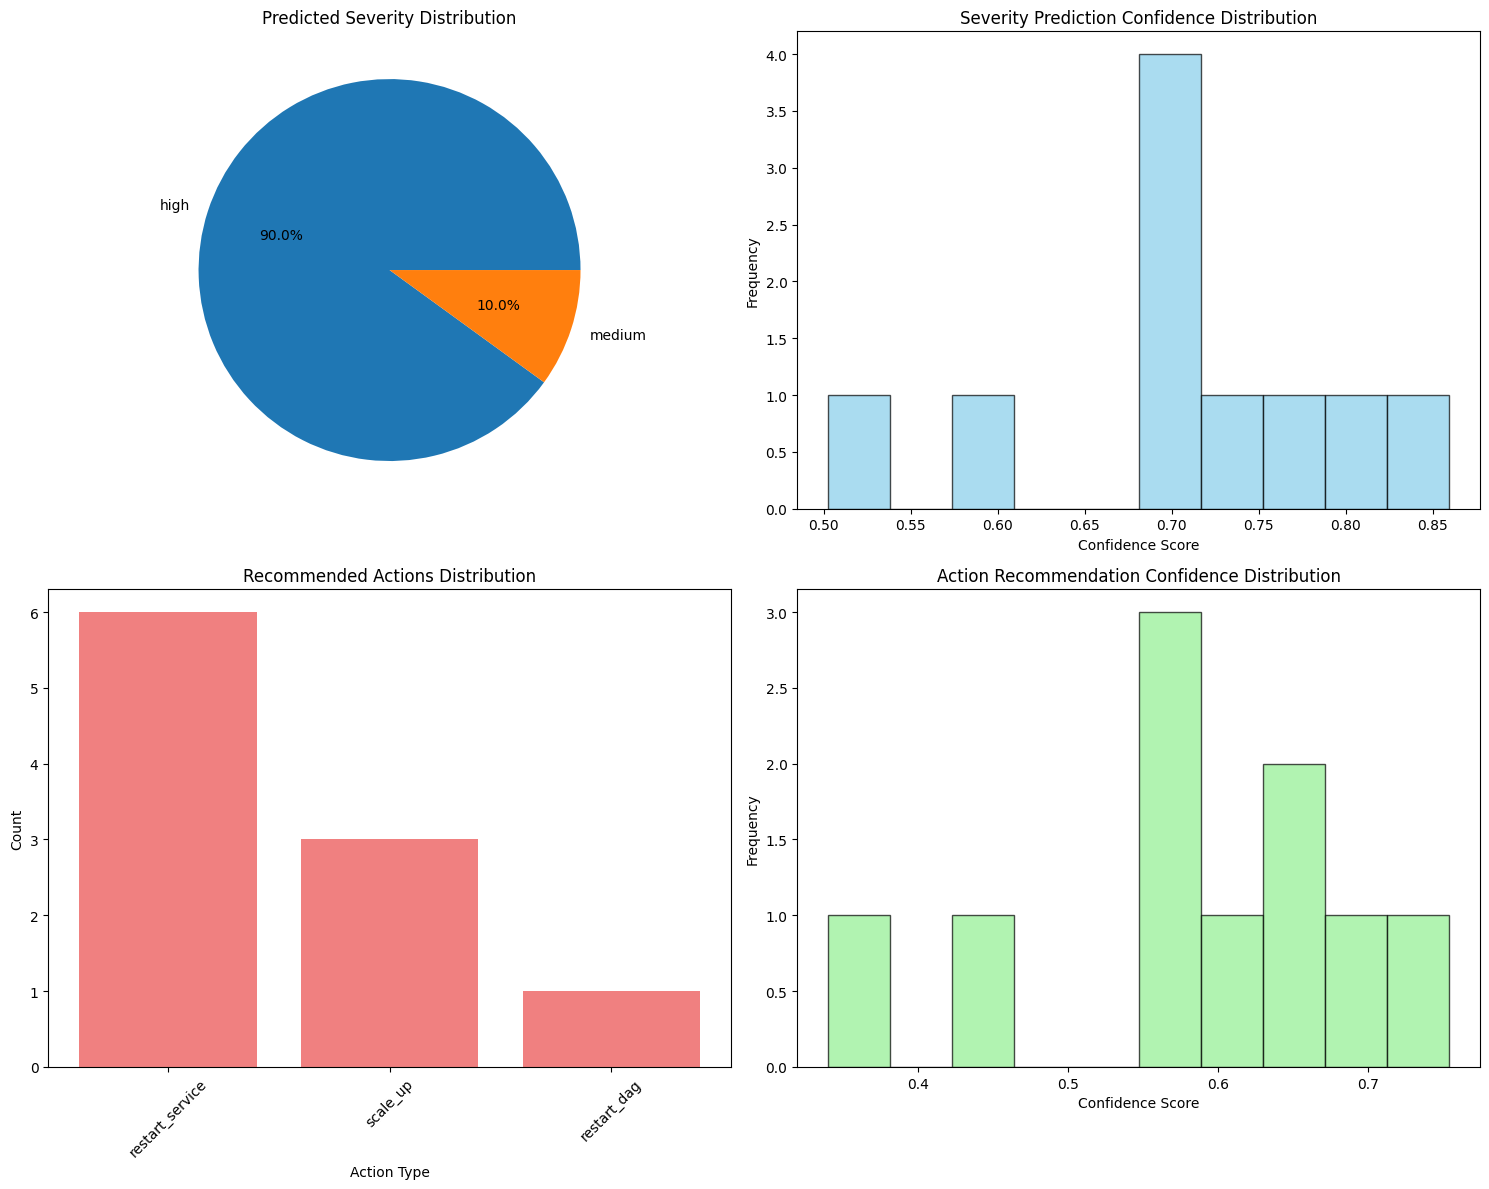

📊 Visualization complete


In [17]:
# Set up plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Severity Distribution
severity_counts = df_predictions['severity'].value_counts()
axes[0, 0].pie(severity_counts.values, labels=severity_counts.index, autopct='%1.1f%%')
axes[0, 0].set_title('Predicted Severity Distribution')

# 2. Confidence Distribution for Severity
axes[0, 1].hist(df_predictions['confidence'], bins=10, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 1].set_title('Severity Prediction Confidence Distribution')
axes[0, 1].set_xlabel('Confidence Score')
axes[0, 1].set_ylabel('Frequency')

# 3. Action Distribution
action_counts = df_actions['action'].value_counts()
axes[1, 0].bar(action_counts.index, action_counts.values, color='lightcoral')
axes[1, 0].set_title('Recommended Actions Distribution')
axes[1, 0].set_xlabel('Action Type')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Confidence Distribution for Actions
axes[1, 1].hist(df_actions['confidence'], bins=10, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 1].set_title('Action Recommendation Confidence Distribution')
axes[1, 1].set_xlabel('Confidence Score')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("📊 Visualization complete")

## 5. Model Performance Summary

Summary of the ML training and performance results.

In [18]:
# Generate summary insights
print("📋 ML Training Demo Summary")
print("=" * 50)

print(f"\n🎯 Successfully Demonstrated:")
print(f"  ✅ ML Service initialization and setup")
print(f"  ✅ Model training with real/sample data")
print(f"  ✅ Incident severity predictions ({len(df_predictions)} test cases)")
print(f"  ✅ Action recommendations ({len(df_actions)} test cases)")
print(f"  ✅ Data visualization and analysis")
print(f"  ✅ Model persistence (save/load)")

print(f"\n📊 Model Performance:")
if hasattr(ml_service, 'model_metadata'):
    incident_acc = ml_service.model_metadata.get('incident_classifier', {}).get('accuracy', 0)
    action_acc = ml_service.model_metadata.get('action_recommender', {}).get('accuracy', 0)
    print(f"  🎯 Incident Classifier Accuracy: {incident_acc:.3f}")
    print(f"  🔧 Action Recommender Accuracy: {action_acc:.3f}")

print(f"\n📊 Prediction Analysis:")
severity_distribution = df_predictions['severity'].value_counts(normalize=True)
action_distribution = df_actions['action'].value_counts(normalize=True)

print(f"  • Most common severity: {severity_distribution.index[0]} ({severity_distribution.iloc[0]:.1%})")
print(f"  • Most recommended action: {action_distribution.index[0]} ({action_distribution.iloc[0]:.1%})")
print(f"  • Average severity confidence: {df_predictions['confidence'].mean():.3f}")
print(f"  • Average action confidence: {df_actions['confidence'].mean():.3f}")

print(f"\n💡 Key Features:")
print(f"  ✅ RandomForest models for robust predictions")
print(f"  ✅ TF-IDF vectorization with bigrams")
print(f"  ✅ Infrastructure context integration")
print(f"  ✅ Joblib model persistence")
print(f"  ✅ Comprehensive error handling")

print(f"\n🎉 Demo completed successfully!")
print(f"📚 The AI On-Call Agent ML system demonstrates core functionality.")
print(f"🚀 Ready for integration with live incident data!")

📋 ML Training Demo Summary

🎯 Successfully Demonstrated:
  ✅ ML Service initialization and setup
  ✅ Model training with real/sample data
  ✅ Incident severity predictions (10 test cases)
  ✅ Action recommendations (10 test cases)
  ✅ Data visualization and analysis
  ✅ Model persistence (save/load)

📊 Model Performance:
  🎯 Incident Classifier Accuracy: 0.700
  🔧 Action Recommender Accuracy: 0.797

📊 Prediction Analysis:
  • Most common severity: high (90.0%)
  • Most recommended action: restart_service (60.0%)
  • Average severity confidence: 0.709
  • Average action confidence: 0.585

💡 Key Features:
  ✅ RandomForest models for robust predictions
  ✅ TF-IDF vectorization with bigrams
  ✅ Infrastructure context integration
  ✅ Joblib model persistence
  ✅ Comprehensive error handling

🎉 Demo completed successfully!
📚 The AI On-Call Agent ML system demonstrates core functionality.
🚀 Ready for integration with live incident data!
